In [1]:
! pip install geopandas rasterio geetools python-dotenv scikit-learn -U

In [2]:
import os
import sys
import rasterio

import ee
from dotenv import load_dotenv

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
ROOT = '/content/drive/Shareddrives/stand_mapping'
load_dotenv(os.path.join(ROOT, '.env'))

service_account = os.getenv('GEE_SERVICE_ACCOUNT')
path_to_key = os.path.join(ROOT, os.getenv('GEE_KEY'))
credentials = ee.ServiceAccountCredentials(service_account, path_to_key)

ee.Initialize(credentials)

In [5]:
sys.path.append('/content/drive/MyDrive/standMappingDraft/')

In [6]:
from src.fetching import sentinel2, landtrendr, dem

In [7]:
# QQUADS = '/content/drive/Shareddrives/stand_mapping/data/interim/oregon_quarter_quads.shp'
# qquads = gpd.read_file(QQUADS)
# subset = qquads.sample(n = 15)
# subset.to_file("/content/drive/MyDrive/standMappingDraft/data/rando_qquads.shp")

In [8]:
# BBOX = (-13590088.699189, 5624670.626589499, -13587657.046227, 5628119.84749)
QQUADS = "/content/drive/MyDrive/standMappingDraft/data/rando_qquads.shp"
YEAR = 2021
EPSG = 3857
FILEPATH = "/content/drive/MyDrive/standMappingDraft/data/"

In [9]:
# to_download = sentinel2.get_sentinel2(QQUADS, YEAR, FILEPATH)
# results = sentinel2.multithreaded_download(to_download)

In [10]:
# to_download = landtrendr.multithreaded_download_preparer(QQUADS, YEAR, FILEPATH)
# results = landtrendr.multithreaded_download(to_download)

In [11]:
LANDTRENDR_FILEPATH = "/content/drive/MyDrive/standMappingDraft/data/landtrendr/2021/"
dem.fetch_dems(QQUADS, FILEPATH, LANDTRENDR_FILEPATH)

Fetching DEMs for 15 tiles

0.........10....

In [15]:
dem = rasterio.open("/content/drive/MyDrive/standMappingDraft/data/dem/106832_dem.tif")
landtrendr = rasterio.open("/content/drive/MyDrive/standMappingDraft/data/landtrendr/2021/106832_landtrendr.tif")
sentinel = rasterio.open("/content/drive/MyDrive/standMappingDraft/data/sentinel/2021/106832_sentinel-leaf-off.tif")

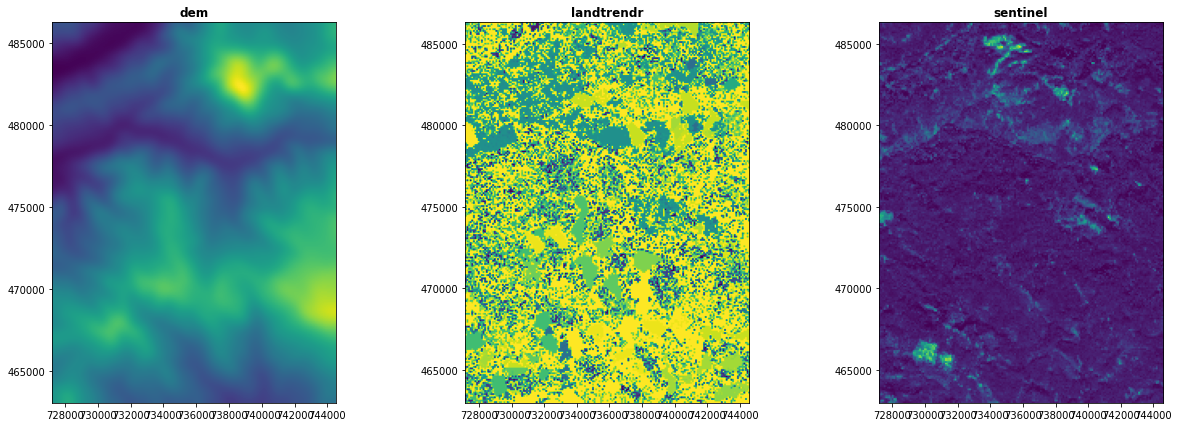

In [16]:
from matplotlib import pyplot
from rasterio.plot import show
fig, (axd, axl, axs) = pyplot.subplots(1,3, figsize=(21,7))
show((dem, 1), ax=axd,  title='dem')
show((landtrendr, 1), ax=axl, title='landtrendr')
show((sentinel, 1), ax=axs, title='sentinel')
pyplot.show()
